In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import json
from os import path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import preprocessing
from ONN_GeneticAlgo import ONN
import threading, time

import scipy
from scipy import signal
import DataUtils as dutl

import networkx as nx

#dutils = dutl.DataUtils()
#%matplotlib widget

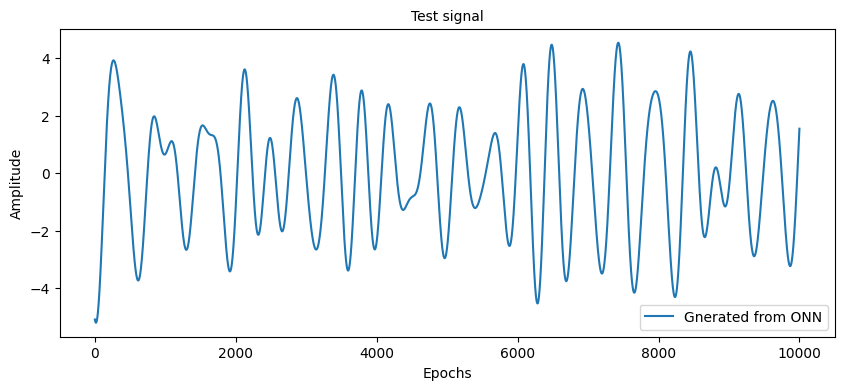

In [2]:
o = ONN(N=10, NEPOCHS=2000)

# #vald_signal, vald_signal_, signal_ = o.generate_test_samples()
testSignal = o.generate_test_samples(NSAMPLES=10000)

# print(vald_signal.shape)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(4)
plt.plot(np.linspace(1, len(testSignal), len(testSignal)), testSignal, label="Gnerated from ONN")
plt.xlabel("Epochs")
plt.ylabel("Amplitude")
plt.title("Test signal")
plt.legend()
plt.show()

# scalar = preprocessing.MinMaxScaler(feature_range=(-3, 3))
# scaled_data = testSignal 
# time = np.linspace(1, len(scaled_data), len(scaled_data))

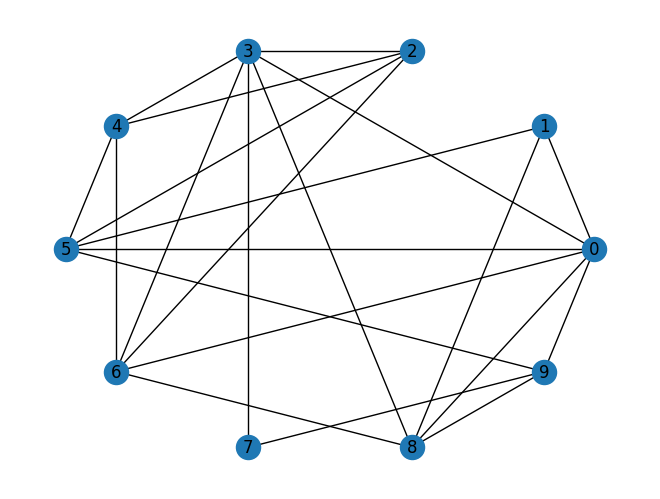

In [3]:
# Create a graph from the adjacency matrix
G = nx.from_numpy_array(o.A_Test)

# Draw the graph
pos = nx.circular_layout(G)
f = plt.figure()
nx.draw(G, pos, with_labels=True)
plt.show()

In [4]:
def Run():
    o.initialize()

    # Assumption: We know forwards weights (alpha), frequency (omega), 
    # and inital phase is for now set as per actual value in the test signal.
    o.ALPHA = o.ALPHA_Test
    o.OMEGA = o.OMEGA_Test
    o.PHI = o.PHI_Test

    # A needs to be adjusted. We know the binary connection but not the strength
    o.A = 0.4*o.A_Test

    o.fit(testSignal)

th1 = threading.Thread(target=Run).start()

[0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4]
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...
Evaluating...


Exception in thread Thread-6:
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/opt/tljh/user/lib/python3.9/threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_344755/4260941312.py", line 13, in Run
  File "/home/jupyter-avinash/ranjan_env_15_Feb_2023/mouse_brain_project/hopf_oscillator/OptimizationGD/Analysis/../ONN_GeneticAlgo.py", line 167, in fit
    result = differential_evolution(self.objective, bounds=bounds, maxiter=self.NEPOCHS, callback=self.my_callback)
  File "/opt/tljh/user/lib/python3.9/site-packages/scipy/optimize/_differentialevolution.py", line 397, in differential_evolution
    ret = solver.solve()
  File "/opt/tljh/user/lib/python3.9/site-packages/scipy/optimize/_differentialevolution.py", line 1015, in solve
    warning_flag = bool(self.callback(self.x, convergence=c))
TypeError: my_callback() got an unexpected keyword argument 

In [5]:
o.A

array([[0. , 0.4, 0. , 0.4, 0. , 0.4, 0.4, 0. , 0.4, 0.4],
       [0.4, 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0.4, 0. ],
       [0. , 0. , 0. , 0.4, 0.4, 0.4, 0.4, 0. , 0. , 0. ],
       [0.4, 0. , 0.4, 0. , 0.4, 0. , 0.4, 0.4, 0.4, 0. ],
       [0. , 0. , 0.4, 0.4, 0. , 0.4, 0.4, 0. , 0. , 0. ],
       [0.4, 0.4, 0.4, 0. , 0.4, 0. , 0. , 0. , 0. , 0.4],
       [0.4, 0. , 0.4, 0.4, 0.4, 0. , 0. , 0. , 0.4, 0. ],
       [0. , 0. , 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0.4],
       [0.4, 0.4, 0. , 0.4, 0. , 0. , 0.4, 0. , 0. , 0.4],
       [0.4, 0. , 0. , 0. , 0. , 0.4, 0. , 0.4, 0.4, 0. ]])

In [61]:
#Things to check
# 1. How important the inital setting of phase is? 
# Ans: Can the way EEG signal recorded be used to set the inital phases of oscillator accordingly?
# 2. Also what about omega? How important inital condition for OMEGA is?
# 3. Without normalized phase difference, does this learning work?

100.0

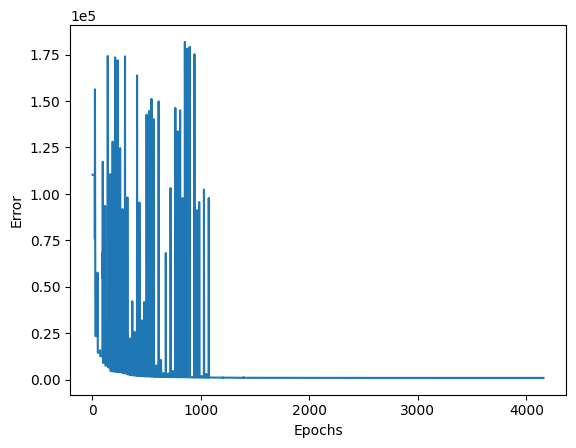

In [7]:
#Error with each epoch
epoch = len(o.ERR)
f = plt.figure()
plt.plot(np.linspace(1, epoch, epoch), o.ERR)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

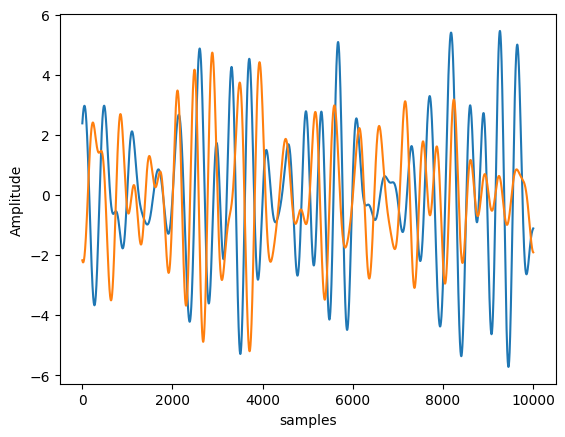

In [3]:
#Reconstructed signal
reconstructedSignal = o.generate_samples(o.NSAMPLES, 1/o.SAMPLING_RATE, 
                                         o.PHI, o.OMEGA, o.A, o.ALPHA)
f = plt.figure()
plt.plot(np.linspace(1, o.NSAMPLES, o.NSAMPLES), reconstructedSignal, label="Reconstructed")
plt.plot(np.linspace(1, o.NSAMPLES, o.NSAMPLES), testSignal, label="Test")
plt.xlabel("samples")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
#TODO:
#Try two things - Genetic algorithm, Recording from multiple sites